# Date of First Positive Specimen
## 2020 was a wild ride of a year. Deaths from Covid-19 have varied as the virus spread across America.

In [1]:
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#importing the csv file
file = pd.read_csv('Covid/Data/clean_data.csv')
file

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,1.0,2,0.461779,0.004861
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,0.0,2,0.461779,0.004861
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,0.0,2,0.461779,0.004861
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,0.0,2,0.461779,0.004861


In [3]:
#grouping the dataframe to compare time of first positive specimen with the age group
dates = file[['month','death_yn','age_group']]

#getting number of deaths
deaths = dates.groupby([dates['month'],dates['age_group']]).sum()
deaths = deaths.unstack()
deaths

death_yn                                                          \
age_group 0 - 9 Years 10 - 19 Years 20 - 29 Years 30 - 39 Years 40 - 49 Years   
month                                                                           
1                 NaN           NaN           0.0           NaN           0.0   
2                 0.0           0.0           0.0           0.0           1.0   
3                 0.0           2.0          29.0         109.0         198.0   
4                 5.0          10.0          28.0          79.0         255.0   
5                 2.0           1.0          12.0          33.0          95.0   
6                 3.0           7.0          45.0         118.0         290.0   
7                 0.0           2.0          15.0          39.0         119.0   
8                 2.0           2.0           7.0          21.0          47.0   
9                 2.0           2.0          13.0          21.0          44.0   
10                1.0           4.0          12.0          20.0          51.0   
11                4.0          14.0          14.0          26.0          38.0   

                                                               
age_group 50 - 59 Years 60 - 69 Years 70 - 79 Years 80+ Years  
month                                                          
1                   0.0           0.0           0.0       NaN  
2                   3.0           4.0           3.0       5.0  
3                 490.0         734.0         708.0     655.0  
4                 750.0        1291.0        1292.0    1864.0  
5                 272.0         595.0         834.0    1530.0  
6                 835.0        1666.0        2193.0    3224.0  
7                 246.0         491.0         658.0     954.0  
8                 166.0         349.0         578.0     885.0  
9                 111.0         236.0         397.0     569.0  
10                109.0         328.0         506.0     869.0  
11                 53.0         161.0         258.0     455.0

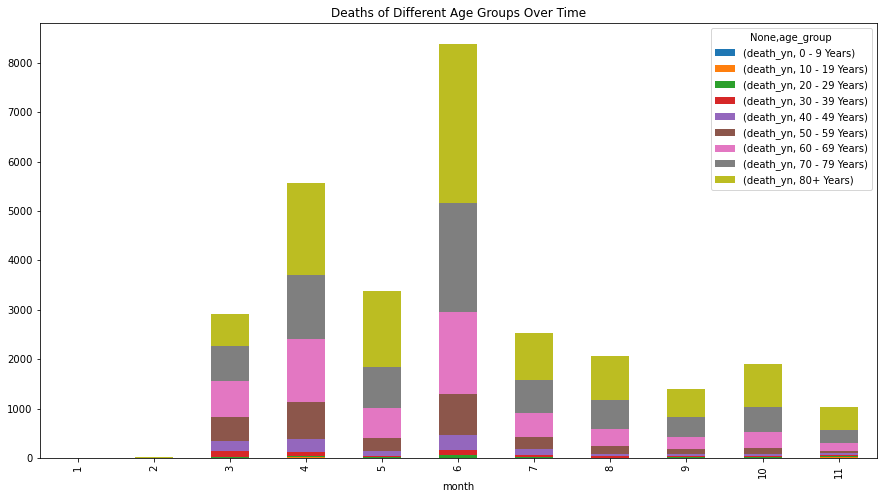

In [33]:
#graphing the deaths of each agegroup for each month
deaths.plot.bar(stacked=True, figsize = (15,8),
                title="Deaths of Different Age Groups Over Time",)

### Here we can see that older people are dying with much more frequency than younger people, and that the older a patient is, the more likely they are to die.

In [24]:
#counting the total reported cases in each age group for each month
total_cases = dates.groupby([dates['month'],dates['age_group']]).count()
total_cases = total_cases.unstack()
total_cases = total_cases.rename(columns={"death_yn":'cases'})
total_cases

cases                                                          \
age_group 0 - 9 Years 10 - 19 Years 20 - 29 Years 30 - 39 Years 40 - 49 Years   
month                                                                           
1                 NaN           NaN           3.0           NaN           3.0   
2                 1.0           1.0           3.0           5.0          13.0   
3                49.0         174.0        1043.0        1362.0        1628.0   
4               329.0         806.0        3817.0        4521.0        4889.0   
5               816.0        1753.0        5164.0        5591.0        5500.0   
6              1457.0        3113.0        7787.0        7112.0        7022.0   
7              2181.0        5993.0       13269.0       10228.0        9463.0   
8              2037.0        6975.0       12979.0        9189.0        8945.0   
9              1855.0        8097.0       11190.0        6852.0        6828.0   
10             2874.0        9208.0       13087.0       10922.0       11083.0   
11             2832.0        8094.0       11321.0       10467.0       10416.0   

                                                               
age_group 50 - 59 Years 60 - 69 Years 70 - 79 Years 80+ Years  
month                                                          
1                   8.0           1.0           1.0       NaN  
2                  15.0          11.0          11.0      10.0  
3                2245.0        2219.0        1466.0    1045.0  
4                6068.0        5363.0        3306.0    3391.0  
5                5948.0        4462.0        2857.0    3426.0  
6                7390.0        6315.0        4749.0    4939.0  
7                9284.0        6737.0        3977.0    2633.0  
8                9102.0        6870.0        4130.0    2816.0  
9                7210.0        5500.0        3647.0    2186.0  
10              11706.0        9545.0        5952.0    3661.0  
11              10669.0        8512.0        5136.0    2865.0

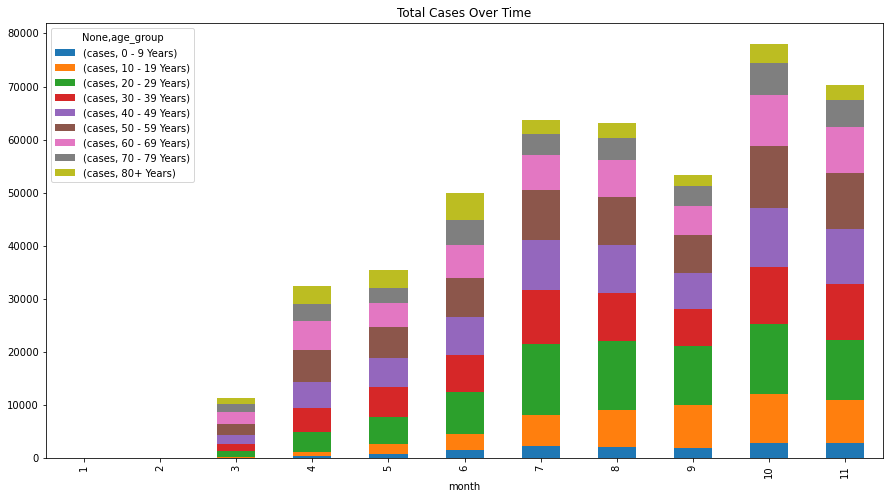

In [34]:
#graphing total cases
total_cases.plot.bar(stacked=True, figsize = (15,8),
                    title="Total Cases Over Time")

### Here we can see that younger people are contracting the disease a lot more frequently than older people.
This would likely be due to the social nature of younger people, and the fact that many younger people absolutely need to work to survive. There have been reports(1) about how millenials have much less money saved than other generations had at our age, which would have a prime factor on survivability during lockdown.


!: https://www.businessinsider.com/average-american-millennial-net-worth-student-loan-debt-savings-habits-2019-6#and-the-typical-millennial-has-less-than-5000-in-their-savings-account-3

In [36]:
#grouping dataframe to compare time of first positive with gender
gender_dates = file[['month','death_yn','sex']]

#getting number of deaths
gender_deaths = gender_dates.groupby([gender_dates['month'],gender_dates['sex']]).sum()
gender_deaths = gender_deaths.unstack()
gender_deaths

death_yn        
sex        0.0     1.0
month                 
1          0.0     0.0
2          6.0    10.0
3       1031.0  1894.0
4       2330.0  3244.0
5       1591.0  1783.0
6       3551.0  4830.0
7       1094.0  1430.0
8        926.0  1131.0
9        605.0   790.0
10       815.0  1085.0
11       447.0   576.0

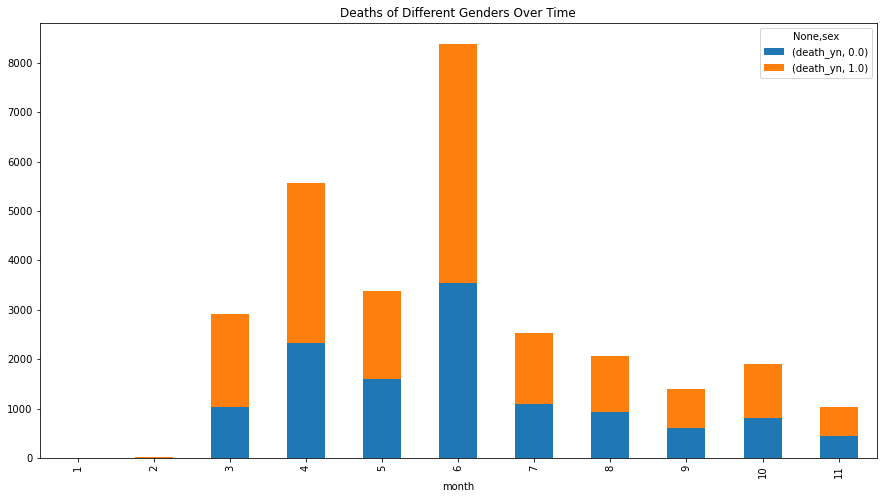

In [37]:
#graphing deaths of each gender by month
gender_deaths.plot.bar(stacked=True, figsize = (15,8),
                      title="Deaths of Different Genders Over Time")

### Here we can see that women tend to survive more often than men, and that over time the balance between the two hasn't really shifted much

In [38]:
#grouping the dataframe to compare time of first positive specimen with the ethnicity
ethnicity_dates = file[['month','death_yn','Race and ethnicity (combined)']]

#getting number of deaths
ethnicity_deaths = ethnicity_dates.groupby([ethnicity_dates['month'],ethnicity_dates['Race and ethnicity (combined)']]).sum()
ethnicity_deaths = ethnicity_deaths.unstack()
ethnicity_deaths

death_yn                                 \
Race and ethnicity (combined)    Asian   Black Hispanic Native  Other   
month                                                                   
1                                  0.0     0.0      0.0    NaN    NaN   
2                                  0.0     6.0      4.0    NaN    0.0   
3                                195.0   781.0    759.0    3.0  147.0   
4                                235.0  1133.0   1067.0   12.0  295.0   
5                                123.0   598.0    333.0   35.0  117.0   
6                                466.0  1894.0   1642.0   23.0  117.0   
7                                 99.0   626.0    399.0   25.0   49.0   
8                                 50.0   321.0    189.0   15.0   33.0   
9                                 37.0   188.0    113.0   15.0   24.0   
10                                34.0   200.0    103.0   18.0   42.0   
11                                13.0    95.0     62.0    4.0   36.0   

                                                        
Race and ethnicity (combined) Pacific Islander   White  
month                                                   
1                                          NaN     0.0  
2                                          NaN     6.0  
3                                          6.0  1034.0  
4                                         12.0  2820.0  
5                                         26.0  2142.0  
6                                         23.0  4216.0  
7                                         16.0  1310.0  
8                                         13.0  1436.0  
9                                          8.0  1010.0  
10                                         4.0  1499.0  
11                                         3.0   810.0

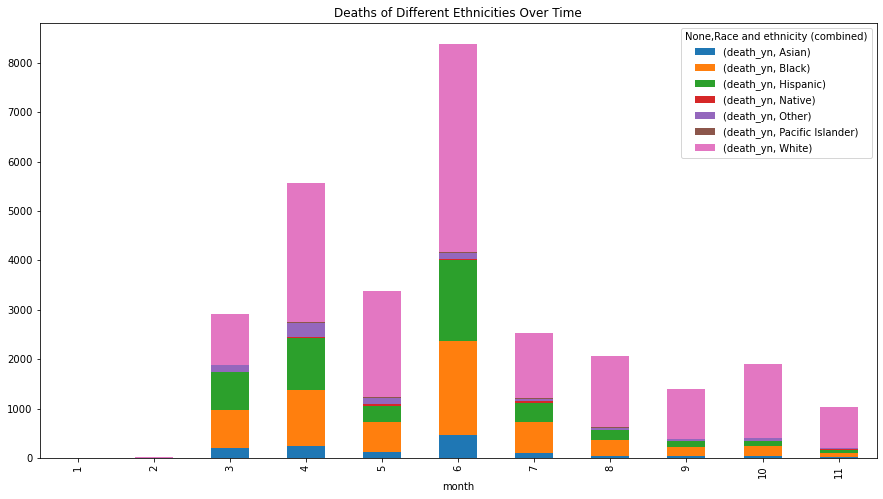

In [39]:
#graphing the number of deaths per race
ethnicity_deaths.plot.bar(stacked=True, figsize = (15,8),
                         title="Deaths of Different Ethnicities Over Time")

### Here we can see that the distribution of deaths among different racial groups is mostly white, but that's probably because white people are more than 60% percent of the American population.
I'll get more in depth in these relationships in my next file, where I focus on race and ethnicity.

In [40]:
#grouping the dataframe to compare time of first positive specimen with the ethnicity
ethnicity_dates = file[['month','death_yn','Race and ethnicity (combined)']]

#getting number of cases
ethnicity_cases = ethnicity_dates.groupby([ethnicity_dates['month'],ethnicity_dates['Race and ethnicity (combined)']]).count()
ethnicity_cases = ethnicity_cases.unstack()
ethnicity_cases = ethnicity_cases.rename(columns={"death_yn":'cases'})
ethnicity_cases

cases                                   \
Race and ethnicity (combined)   Asian    Black Hispanic Native   Other   
month                                                                    
1                                 4.0      3.0      2.0    NaN     NaN   
2                                 6.0     14.0     15.0    NaN     2.0   
3                               509.0   2255.0   2374.0   30.0   465.0   
4                              1239.0   5562.0   8568.0   90.0  1387.0   
5                              1935.0   5988.0  10903.0  201.0  1249.0   
6                              2127.0   7658.0  17642.0  191.0   959.0   
7                              1734.0  10932.0  17207.0  245.0  1805.0   
8                              1541.0   6725.0  11422.0  290.0  1762.0   
9                              1371.0   4738.0   7478.0  177.0  1647.0   
10                             1566.0   6147.0  11707.0  232.0  2171.0   
11                             1483.0   5614.0  10413.0  187.0  2097.0   

                                                         
Race and ethnicity (combined) Pacific Islander    White  
month                                                    
1                                          NaN      7.0  
2                                          NaN     33.0  
3                                         48.0   5550.0  
4                                        104.0  15540.0  
5                                        293.0  14948.0  
6                                        520.0  20787.0  
7                                        487.0  31355.0  
8                                        329.0  40974.0  
9                                        187.0  37767.0  
10                                       367.0  55848.0  
11                                       313.0  50205.0

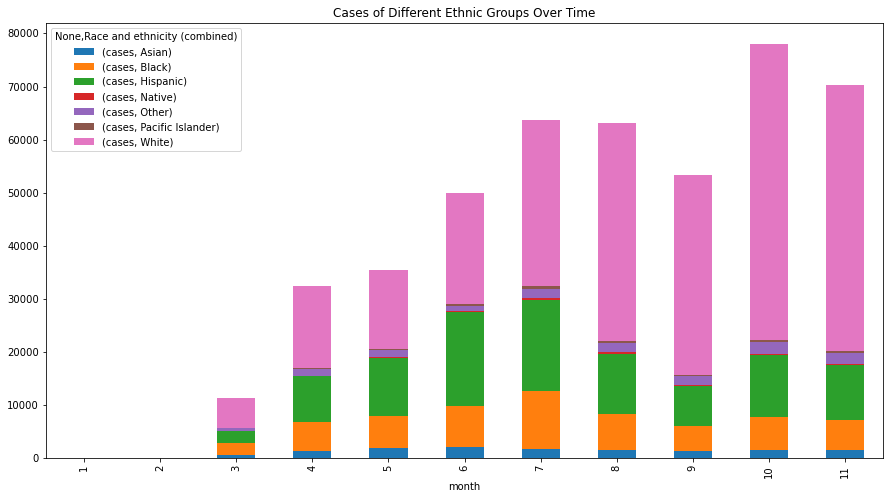

In [42]:
#graphing the number of cases per ethnic group
ethnicity_cases.plot.bar(stacked=True, figsize = (15,8),
                        title="Cases of Different Ethnic Groups Over Time")

## Now to see if there's a correlation between hospital occupancy of covid patients and death

In [52]:
#grouping the dataframe to compare time of first positive specimen with the age group
dates = file[['month','death_yn']]
#dates
#getting number of deaths
deaths = dates.groupby('month').sum()
# deaths = deaths.unstack()
#deaths
occupancy = file[['month', 'percent_of_inpatients_with_covid']]
occupancy = occupancy.groupby('month').mean()
occupancy.index
deaths['percent_of_inpatients_with_covid'] = occupancy['percent_of_inpatients_with_covid']
deaths

,death_yn,percent_of_inpatients_with_covid
month,,
1,0.0,0.000000
2,16.0,0.004861
3,2925.0,0.067229
4,5574.0,0.148326
5,3374.0,0.111960
6,8381.0,0.078412
7,2524.0,0.105063
8,2057.0,0.087548
9,1395.0,0.068433


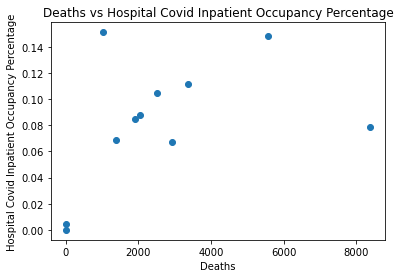

In [53]:
plt.title("Deaths vs Hospital Covid Inpatient Occupancy Percentage")
plt.xlabel("Deaths")
plt.ylabel("Hospital Covid Inpatient Occupancy Percentage")
plt.scatter(deaths['death_yn'],deaths['percent_of_inpatients_with_covid'])

In [47]:
correlation = st.pearsonr(deaths['death_yn'],deaths['percent_of_inpatients_with_covid'])
correlation

(0.42141062534097157, 0.19675615934289237)

### That's a pretty low correlation coefficient
Being as that is the case there isn't really a strong correlation between hospital occupancy of covid inpatients and death over the year

# Next up, let's look at whether or not the patient was put in ICU, and if that was effective at preventing death over the year

In [48]:
#grouping the dataframe to compare time of first positive specimen with the age group
dates = file[['month','death_yn']]
#dates
#getting number of deaths
deaths = dates.groupby('month').sum()
# deaths = deaths.unstack()
#deaths
occupancy = file[['month', 'icu_yn']]
occupancy = occupancy.groupby('month').sum()
occupancy.index
deaths['icu_yn'] = occupancy['icu_yn']
deaths

,death_yn,icu_yn
month,,
1,0.0,3.0
2,16.0,18.0
3,2925.0,3121.0
4,5574.0,5037.0
5,3374.0,3074.0
6,8381.0,6402.0
7,2524.0,3373.0
8,2057.0,2344.0
9,1395.0,1749.0


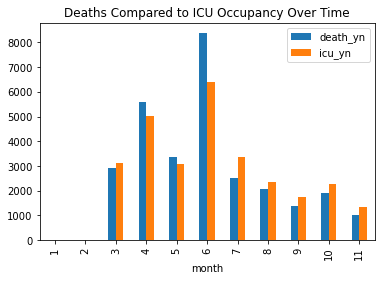

In [50]:
deaths.plot.bar(title='Deaths Compared to ICU Occupancy Over Time')

### Here we can see that in the early months of the pandemic, there were more deaths than ICU occupants. 
Especially in June, when there was a surge of cases and deaths. Perhaps over time our medical community learned how to better treat covid patients. It's obvious that people were being sent to the ICU but they maybe just didn't know the signs of when a patient needed to go to the ICU. It appears that as time went on, there were not only less deaths, but higher numbers of patients in the ICU than dying, which would suggest that the treatments being recieved in the ICU are working.